# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb


# Load Experimental data

## select files and channels

In [22]:
annots = loadmat('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\merge\\merge_0315_conv_on_0.1_RL_6.5mW.mat'
                 ,squeeze_me =True)
dt = 1/60

In [4]:
sti = annots['bin_pos']
## bar width 5pixel; sti range 189pixel=38bar
rstate = np.zeros((60, sti.shape[0]))
T=np.arange(len(sti))*dt

chnum = 26
rstate, _ = np.histogram(annots['reconstruct_spikes'][chnum-1], np.append(T,T[-1]+dt))

## RFProperties

In [5]:
annots = loadmat('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\Analyzed_data\\30Hz_27_RF_15min\\unsort\\RF_properties'
                 , squeeze_me=True)
RFP = annots['RF_properties']
RFP[chnum-1].dtype

dtype([('Amplitude', 'O'), ('X_Coor', 'O'), ('X_Width', 'O'), ('Y_Coor', 'O'), ('Y_Width', 'O'), ('Angle', 'O'), ('radius', 'O')])

In [6]:
def R_el(a,b,o):
    return a*b/np.sqrt(a**2*np.sin(o)**2+ b**2*np.cos(o)**2)

In [7]:
BS = loadmat('C:\\Users\\llinc\\GitHub\\retina_exp\\calibration\\20200219oled_calibration\\oled_boundary_set'
                 , squeeze_me=True)

In [8]:
hRFsize = R_el(RFP[chnum-1]['X_Width'], RFP[chnum-1]['Y_Width'] ,RFP[chnum-1]['Angle'] )/BS['micro_per_pixel']
print(hRFsize/5)
cellpos = (RFP[chnum-1]['X_Coor']-BS['leftx_bar'])
if cellpos%5<2.5:
    print('偏左')
else:
    print('偏右')

8.726916216064058
偏左


<BarContainer object of 1 artists>

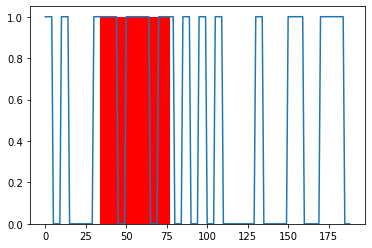

In [9]:
plt.plot(sti[0])
plt.bar(cellpos,1,width=hRFsize, color = 'r')

# Difine $x_{state}$

In [10]:
def DivCovState(sti, cellpos, Dis = 2):
    #number state = 2^5
    state = 0
    for DisFromCell in np.arange(-Dis,Dis+1):
        if sti[cellpos+DisFromCell] > 0:
            state += 2**(Dis+DisFromCell)
    return state

In [11]:
xstate = np.array([DivCovState(substi[::5], int(cellpos/5), 2) for substi in sti])

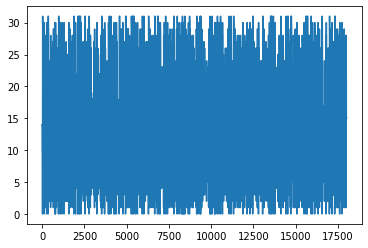

In [12]:
plt.plot(xstate)

# Cal. MI

In [13]:
window = [-1,1] # second
timeshift, Information = PIfunc(rstate, xstate, xstate, dt, window)

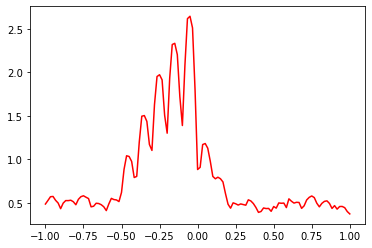

In [14]:
plt.plot(timeshift,Information[('Beer','UIx')]+Information[('Beer','Red')], 'r-')

(8800, 9200)

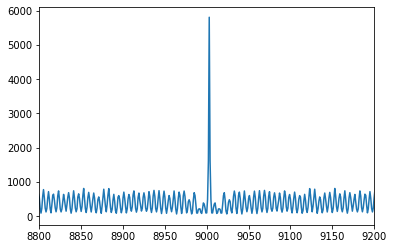

In [17]:
plt.plot(np.correlate(rstate, rstate, 'same'))
plt.xlim([8800, 9200])

(8800, 9200)

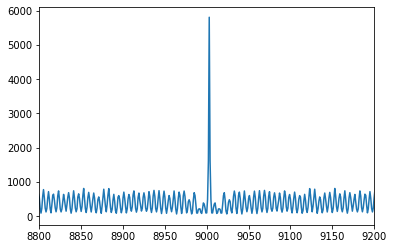

In [30]:
annots = loadmat('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\merge\\merge_0315_conv_on_0.1_RL_6.5mW.mat'
                 ,squeeze_me =True)
dt = 1/60
sti = annots['bin_pos']
## bar width 5pixel; sti range 189pixel=38bar
rstate = np.zeros((60, sti.shape[0]))
T=np.arange(len(sti))*dt

chnum = 26
rstate, _ = np.histogram(annots['reconstruct_spikes'][chnum-1], np.append(T,T[-1]+dt))

plt.plot(np.correlate(rstate, rstate, 'same'))
plt.xlim([8800, 9200])

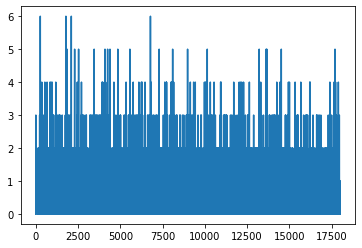

In [31]:
plt.plot(rstate)

(8800, 9200)

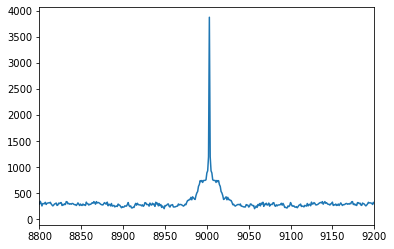

In [28]:
annots = loadmat('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\merge\\merge_0727_OUsmooth_Bright_RL_G4.5_5min_Q100_6.5mW_1Hz.mat'
                 ,squeeze_me =True)
dt = 1/60
sti = annots['bin_pos']
## bar width 5pixel; sti range 189pixel=38bar
rstate = np.zeros((60, sti.shape[0]))
T=np.arange(len(sti))*dt

chnum = 26
rstate, _ = np.histogram(annots['reconstruct_spikes'][chnum-1], np.append(T,T[-1]+dt))

plt.plot(np.correlate(rstate, rstate, 'same'))
plt.xlim([8800, 9200])

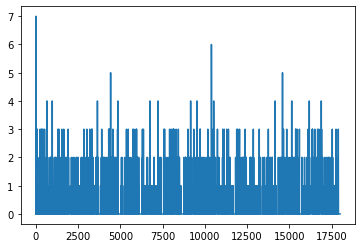

In [29]:
plt.plot(rstate)